# TD 1.2 Prédiction sur des données médicales brutes

Dans ce TD, nous allons enfin faire du vrai apprentissage. Pour cela, nous allons prendre la base classique de *Indian Diabete* (qui n'est pas sur le diabète des Indiens, mais sur les données d'une compagnie d'assurance aux US qui porte ce nom).

Nous avons en entrée un table de 9 valeurs, dont les 8 premières colonnes correspondent aux données biologiques des patients et la dernière colonne correspond à la sortie à prédire (diabète / Pas diabète).

- Chargez la table et affichez les trois premières lignes

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as skp

# Create first network with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load pima indians dataset
dataset = np.loadtxt("pima-indians-diabetes.data", delimiter=",")
# split into input (X) and output (Y) variables
print(dataset[:3,:])
X = dataset[:,:8]
Y = dataset[:,8]

[[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]]


## Estimer la distribution des valeurs

- Utilisez, dans la bibliothèque `Pandas` la méthode `violinplot()` permettant d'estimer la distribution des valeurs par colonne. L'idée est d'aider l'apprentissage en explorant l'étendue des valeurs et leurs distributions

268 / 768


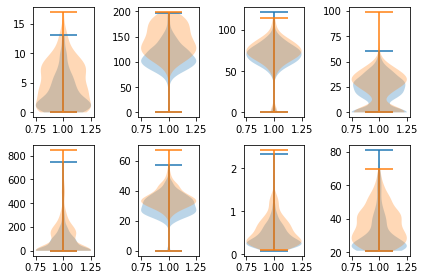

In [42]:
print(int(sum(dataset[:,8])),"/",len(dataset[:,1]))
##################### A remplir ici pour avoir un joli dessin comme ci-dessous

for i in range(8):
    features = dataset[:,i]
    plt.subplot(2,4,i+1)
    plt.violinplot(features[Y==0])
    plt.violinplot(features[Y==1])
plt.tight_layout()

## Matrice de corrélation

- Vérifiez, en utilisant Pandas, que la matrice de corrélation des valeurs ne fait pas apparaître de valeurs en trop (qui seraient corrélées)

Matrice de corrélation


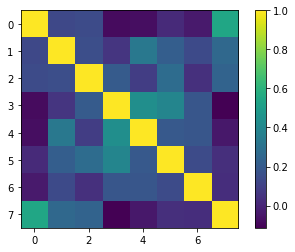

In [43]:
print("Matrice de corrélation")
# Explorez Pandas et donnez les deux lignes permettant de dessiner cela:
corr = np.corrcoef(X.T)
plt.imshow(corr, cmap='viridis')
plt.colorbar()

## Normalisez les données (par colonne)

- Utilisez la méthode `scale` de scikit learn pour normaliser les données. Représentez de nouveau les violin plots une fois normalisés

Avant normalisation :  [  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]
Après normalisation : [-7.74843153e-17  3.61400724e-18 -1.32724416e-17  7.76288755e-17
 -5.49329101e-17  2.97273780e-15  1.92438658e-15  2.19297959e-16]


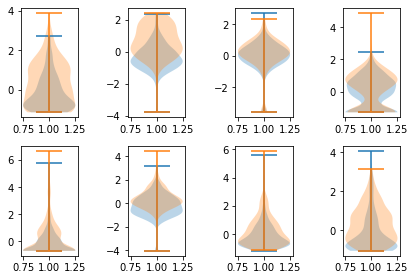

In [44]:
# Normalisation

x_norm = skp.scale(X)
print("Avant normalisation : ", X.mean(axis=0))
print("Après normalisation :", x_norm.mean(axis=0))

for i in range(8):
    features = x_norm[:,i]
    plt.subplot(2,4,i+1)
    plt.violinplot(features[Y==0])
    plt.violinplot(features[Y==1])
plt.tight_layout()

## Equilibrez les données entre elle

- Comptez le nombre d'exemple suivant le résultat dans la dernière colonne
- Proposez une méthode permettant d'équilibrer les données

In [45]:
m_zeros = len(np.where(Y==0)[0])
m_ones = len(np.where(Y==1)[0])
print(m_zeros, m_ones)

500 268


## Conception du réseau de neurones

- Proposez un réseau de neurones pour prédire les bonnes valeurs (inutile à ce stade de mettre trop de couches)
- Comptez à la main le nombre de paramètres que la méthode `fit` devra assigner

In [46]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(8,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

# Nombre de paramètres ?
# Première couche : 16 * (8+1)
# Deuxième couche : 16 * (16 + 1)
# Troisième couche = 1 * (16 + 1)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None


## Lancez l'apprentissage !

Utilisez le code ci dessous pour lancer l'apprentissage. Vous pourrez remplacer `X` et `Y` par le nom de vos données

In [47]:
class History(Callback):
    
    def __init__(self):
        self.history = {}
        
    def on_epoch_end(self, epoch, logs={}):       
        for k,v in logs.items():
            if not k in self.history: self.history[k]=[]
            self.history[k].append(v)
        print(".",end="")
history=[History()]

model.fit(x_norm, Y, epochs=300, batch_size=100,  verbose=0, validation_split=0.33,
         callbacks=history)


............................................................................................................................................................................................................................................................................................................

## Observez les courbes caractéristiques de l'apprentissage

Utilisez le code suivant pour représenter les courbes de l'apprentissage.


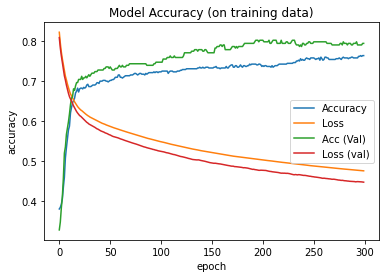

In [48]:
# Model accuracy
plt.plot(history[0].history['accuracy'])
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_accuracy'])
plt.plot(history[0].history['val_loss'])
plt.title('Model Accuracy (on training data)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss', 'Acc (Val)', 'Loss (val)'])
plt.show()


## Jouez avec les paramètres de l'apprentissage

- Ajoutez des couches et observez les qualités de l'apprentissage
- Ajoutez des couches de `Dropout()`
